Partie 1
#Chargement des données 

In [589]:
import pandas as pd
import re

def extract_data(input_path, pattern):
    with open(input_path, 'r') as file:
        content = file.read()
    matches = re.findall(pattern, content, re.MULTILINE)
    data = []
    for match in matches:
        numbers = match[1].replace('\n', ' ').split()
        numbers_float = [float(number) for number in numbers]
        data.append(numbers_float)
    return pd.DataFrame(data)

rocks_path = 'data/sonar.rocks'
mines_path = 'data/sonar.mines'

# Patterns for extracting train and test data
train_pattern = r'\*(CR|CM)\d+:\n\{([\d\s\.\n]+)\}'
test_pattern = r'^(?!\*)(CR|CM)\d+:\n\{([\d\s\.\n]+)\}'

# Extracting train and test data
rocks_train_df = extract_data(rocks_path, train_pattern)
mines_train_df = extract_data(mines_path, train_pattern)
rocks_train_df['Label'] = 'R'  
mines_train_df['Label'] = 'M' 
train_df = pd.concat([rocks_train_df, mines_train_df], ignore_index=True).sample(frac=1).reset_index(drop=True)

rocks_test_df = extract_data(rocks_path, test_pattern)
mines_test_df = extract_data(mines_path, test_pattern)
rocks_test_df['Label'] = 'R'  
mines_test_df['Label'] = 'M' 
test_df = pd.concat([rocks_test_df, mines_test_df], ignore_index=True).sample(frac=1).reset_index(drop=True)

print(len(train_df))
print(len(test_df)) 


104
104


Partie 2

##Apprentissage sur train

In [590]:
import numpy as np

def perceptron_batch(training_features, training_labels, epochs=22000, learning_rate=0.001):
    """
    Entraîne un perceptron en utilisant l'algorithme batch.

    :param training_features: numpy.ndarray, les caractéristiques d'entraînement.
    :param training_labels: numpy.ndarray, les étiquettes d'entraînement (doivent être -1 ou 1).
    :param threshold: int, le nombre d'itérations pour l'entraînement.
    :param learning_rate: float, le taux d'apprentissage.
    :return: numpy.ndarray, les poids appris.
    """
    # Initialisation des poids
    weights = np.zeros(training_features.shape[1] + 1)
    
    # Entraînement
    for _ in range(epochs):
        # Initialisation du vecteur de mise à jour pour cette époque
        update = np.zeros(training_features.shape[1] + 1)
        
        for inputs, label in zip(training_features, training_labels):
            # Calcul de la prédiction
            activation = np.dot(inputs, weights[1:]) + weights[0]
            if activation >= 0:
                prediction = 1
            else:
                prediction = -1
            
            # Accumulation de la mise à jour basée sur l'erreur
            update[1:] += learning_rate * (label - prediction) * inputs
            update[0] += learning_rate * (label - prediction)
        
        # Mise à jour des poids à la fin de l'époque
        weights += update
    
    return weights

# Préparation des données
# Supposons que train_df est déjà défini et mélangé
# Convertir les étiquettes 'R' et 'M' en valeurs numériques -1 et 1
train_df['Label'] = train_df['Label'].apply(lambda x: 1 if x == 'M' else -1)
test_df['Label'] = test_df['Label'].apply(lambda x: 1 if x == 'M' else -1)

# Séparation des caractéristiques et des étiquettes
features = train_df.iloc[:, :-1].values
labels = train_df.iloc[:, -1].values

# Entraînement du perceptron
weights = perceptron_batch(features, labels)

print("Poids appris du perceptron :")
print(weights)

Poids appris du perceptron :
[-0.97       0.8420278  2.0658004  0.3804708  1.1042078  0.7305548
  1.4228062 -0.6529304 -1.560438   0.078951   1.051963   0.4017898
  0.1314612  0.025631   0.030759   0.60702   -1.9347328 -0.5534312
  2.0097548 -0.3752016 -0.0929494 -0.3728288  0.580748  -0.4330444
  1.0691756 -0.1235372 -0.12027    0.0988588 -0.1897708 -0.1889602
  2.0169582 -3.0205064  2.2726612 -1.5599698  0.7229634 -0.3956484
 -0.2107238 -0.384936  -0.1931328  1.6621272 -1.499479   0.6216998
 -0.1415718 -0.10346   -0.63842    1.1927348  1.0241594 -1.0331272
  2.0756532  2.8527744 -1.2443966  0.5248746  0.503502   0.2882028
  0.8085986 -0.119122  -0.2255426 -0.5310398  0.3384052 -0.1432184
 -0.1570006]


Test sur l'ensemble de test

In [591]:
# # Supposons que `weights` est le vecteur de poids appris du perceptron
# def predict_perceptron(inputs, weights):
#     activation = np.dot(inputs, weights[1:]) + weights[0]
#     return 1 if activation >= 0 else -1

# # Supposons que test_df contient uniquement les caractéristiques sans les étiquettes
# test_features = test_df.iloc[:, :60].values  # Sélectionne uniquement les colonnes de caractéristiques

# # Faire des prédictions
# predictions = [predict_perceptron(x, weights) for x in test_features]

# # Affichage des prédictions
# print(predictions)


Calcul de Ea et de Eg

In [592]:
def predict_perceptron(inputs, weights):
    activation = np.dot(inputs, weights[1:]) + weights[0]
    return 1 if activation >= 0 else -1

# Fonction pour calculer la précision
def calculate_accuracy(features, labels, weights):
    predictions = [predict_perceptron(x, weights) for x in features]
    correct_predictions = sum(pred == label for pred, label in zip(predictions, labels))
    accuracy = correct_predictions / len(labels)
    return accuracy

# Convertir les étiquettes de l'ensemble de test en valeurs numériques -1 et 1
# test_df['Label'] = test_df['Label'].apply(lambda x: 1 if x == 'M' else -1)

# Séparer les caractéristiques et les étiquettes de l'ensemble de test
test_features = test_df.iloc[:, :-1].values
test_labels = test_df.iloc[:, -1].values

print (test_labels)
predictions = [predict_perceptron(x, weights) for x in test_features]
print (predictions)
# Calculer la précision sur l'ensemble d'entraînement et de test
training_accuracy = calculate_accuracy(features, labels, weights)
testing_accuracy = calculate_accuracy(test_features, test_labels, weights)

# Calculer les erreurs d'apprentissage (Ea) et de généralisation (Eg)
Ea = 1 - training_accuracy
Eg = 1 - testing_accuracy

print(f"Erreur d'apprentissage (Ea) : {Ea}")
print(f"Erreur de généralisation (Eg) : {Eg}")

[ 1 -1  1  1  1 -1 -1  1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1 -1 -1 -1
 -1  1  1 -1  1  1  1  1 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1  1  1 -1
 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1  1  1
  1 -1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1
 -1  1  1 -1  1  1 -1  1]
[1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1]
Erreur d'apprentissage (Ea) : 0.09615384615384615
Erreur de généralisation (Eg) : 0.21153846153846156


Fonction de stabilité

In [593]:
def calculate_stability(features, labels, weights):
    norm_w = np.linalg.norm(weights[1:])  # Calcul de la norme du vecteur de poids (sans le biais)
    stabilities = []
    for x, y in zip(features, labels):
        # Calcul de la marge fonctionnelle pour chaque exemple
        gamma = y * (np.dot(weights[1:], x) + weights[0]) / norm_w
        stabilities.append(gamma)
    return stabilities

# Calcul des stabilités pour l'ensemble de test
test_stabilities = calculate_stability(test_features, test_labels, weights)

# Afficher les stabilités des exemples de test
print(test_stabilities)


[0.05046374750750946, 0.09535031239385663, 0.13516027067689013, 0.008768296798196715, -0.10115592419810883, 0.05656827866001008, 0.02442190467127189, 0.06156800047171571, 0.011592605466375775, 0.05744400884917563, 0.14983821423896235, 0.052919070848854, 0.061120387501338864, -0.0020709419757585583, 0.03220157605122247, 0.12732737396210353, 0.13133833910823467, 0.059243832850231076, 0.04746548408476879, 0.028708402649697116, 0.03603391489865992, 0.013705342505812061, 0.031677350696201305, 0.11093351773661679, -0.04427656907116902, 0.054182339792491215, 0.08746923950006333, 0.04471441442347073, 0.10118167625743209, 0.04456263752668724, 0.04387946220911927, 0.06208872746262407, 0.11010162007547784, 0.05878701308205566, 0.037548507758852816, 0.006760312766670201, 0.1328949972725936, -0.0012139349952312456, 0.008986281262822134, 0.06348714620050055, 0.040299643211831555, -0.013233204814759016, -0.09326500537014659, 0.055687162060207594, -0.0017743986122246184, 0.06550529545789265, 0.1047990

Graph

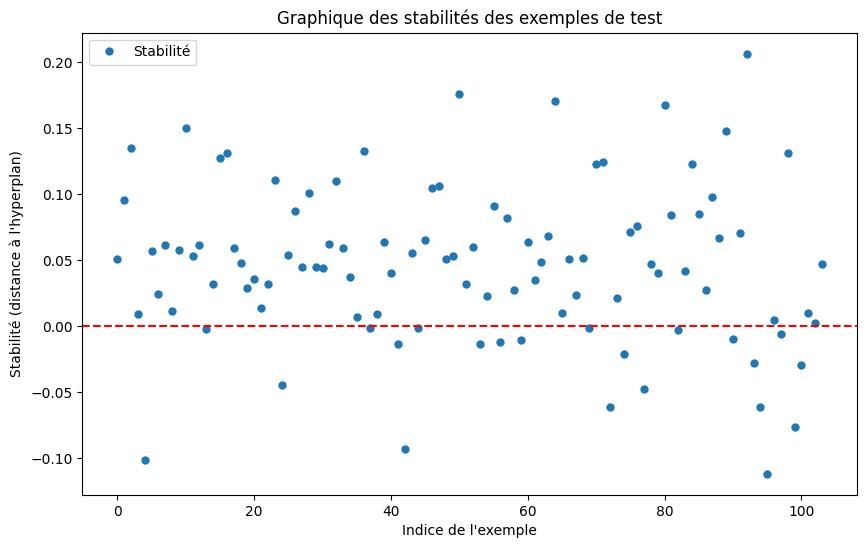

In [594]:
import matplotlib.pyplot as plt

# Calcul des stabilités pour l'ensemble de test (réutilisation du code précédent)
test_stabilities = calculate_stability(test_features, test_labels, weights)

# Création du graphique des stabilités
plt.figure(figsize=(10, 6))
plt.plot(test_stabilities, marker='o', linestyle='None', markersize=5, label='Stabilité')
plt.axhline(0, color='red', linestyle='--')  # Ligne pour la marge de stabilité à 0
plt.title("Graphique des stabilités des exemples de test")
plt.xlabel("Indice de l'exemple")
plt.ylabel("Stabilité (distance à l'hyperplan)")
plt.legend()
plt.show()